<a href="https://colab.research.google.com/github/d-vf/notebooks/blob/master/HW_II_(log_linear)_R_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HomeWork Assignment I
## Data description, Single Regression and Multiple Regression

Objective: Work through data, present rich descriptive statistics and build some models. Some hints:
* Set a general research question in a topic of your interest
* Select the data
* Create the variables you need for the analysis
* Explore and describe the data and show some statistics
* Perform single regressions and explain the importance of the variables used
* Perform multiple regression and explain clearly

Page limit: 3 pages.
The evaluation will take into account the following key factors:
 * Data analysis
 * Interpretation and clear explanation of results

## Setup


In [1]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [0]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

## Libraries

In [3]:
install.packages('codetools') #Code Analysis Tools for R
install.packages('data.table') #Fast aggregation of large data (not needed as 20 0000 is a small sample)
install.packages('ggplot2') #for basic charts this is not needed (as has a learning curve)
install.packages('stargazer') #beautiful LATEX, HTML and ASCII tables from R statistical output (not needed as the output is not latex and be used UTF-8)
install.packages('lmtest') #Testing Linear Regression Models
install.packages('dplyr') # A Grammar of Data Manipulation (to replace data.table)
install.packages('gsheet') #for reading from gsheet (sliced file)
install.packages('GGally') # corr plot and confusion matrix

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Research Question: 

Factors (happiness and gender) that influence Equivalised monthly household income in PPP euros (continuous) 

Data: Dataset:European Quality of Life Survey Integrated Data File, 2003-2016

Source: https://beta.ukdataservice.ac.uk/





In [0]:
library(readr) 
url <- "/eqls_integrated_trend_2003_2016.csv" 
data <- read.csv(url, header=TRUE, quote="\"", na.strings = "NA", fill = TRUE )

## Filter PT

In [0]:
dataPT <- subset(data, Y16_Country=='23')

# Select Variables

Dependant:

* Y16_Income_Equivalised (Equivalised monthly household income in PPP euros)

Predictors as

- Gender

Pos. = 14	Variable = Y16_HH2a	Variable label = Respondent sex
This variable is  numeric, the SPSS measurement level is NOMINAL
SPSS user missing values = 998.0 thru None

''

	Value label information for Y16_HH2a
	Value = 1.0	Label = Male
	Value = 2.0	Label = Female


- Hapiness (1 very unhappy, 10 Very happy)

Pos. = 57	Variable = Y16_Q5	Variable label = Taking all things together on a scale of 1 to 10, how happy would you say you are?
This variable is  numeric, the SPSS measurement level is SCALE
SPSS user missing values = 98.0 or 99.0
''

	Value label information for Y16_Q5
	Value = 1.0	Label = Very unhappy
	Value = 2.0	Label = 2
	Value = 3.0	Label = 3
	Value = 4.0	Label = 4
	Value = 5.0	Label = 5
	Value = 6.0	Label = 6
	Value = 7.0	Label = 7
	Value = 8.0	Label = 8
	Value = 9.0	Label = 9
	Value = 10.0	Label = Very happy
	Value = 98.0	Label = Don't know
	Value = 99.0	Label = Refusal



### Encode categorical variables
* The default option is to use the first level of the factor as a reference and interpret the remaining levels relative to this level.

* This case reference: 
  - gender: male (1)
  - happiness: Very unhappy (1) 

In [0]:
dataPTsample <- data.frame(dataPT$Y16_Income_Equivalised, dataPT$Y16_HH2a, dataPT$Y16_Q5)

In [7]:
summary(dataPTsample) 

 dataPT.Y16_Income_Equivalised dataPT.Y16_HH2a dataPT.Y16_Q5   
 Min.   :   1.212              Min.   :1.00    Min.   : 1.000  
 1st Qu.: 383.142              1st Qu.:1.00    1st Qu.: 6.000  
 Median : 629.723              Median :2.00    Median : 7.000  
 Mean   : 825.679              Mean   :1.57    Mean   : 7.629  
 3rd Qu.: 979.431              3rd Qu.:2.00    3rd Qu.: 8.000  
 Max.   :9760.705              Max.   :2.00    Max.   :98.000  
 NA's   :1592                                                  

## Clean up 

### Removing all rows with any NA

* This case just removed all for simplicity



In [0]:
dataPTsample <- dataPTsample[complete.cases(dataPTsample), ]

## Remove:

Value = 99.0	Label = (Refusal)
Value = 98.0	Label = (Don't know)

## Replace

Value = 1.0	Label = Male -> 0

Value = 2.0	Label = Female -> 1

## Set as factor (0 & 1)



### Y16_Q5	Variable label = Taking all things together on a scale of 1 to 10, how happy would you say you are?


In [9]:
summary(dataPTsample$dataPT.Y16_Q5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.000   7.000   7.473   8.000  98.000 

In [0]:
dataPTsample <- subset(dataPTsample, dataPT.Y16_Q5 != '99' & dataPT.Y16_Q5!= '98')

In [0]:
dataPTsample$dataPT.Y16_Q89a <- factor(dataPTsample$dataPT.Y16_Q5)

In [12]:
summary(dataPTsample$dataPT.Y16_Q5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   7.000   6.851   8.000  10.000 

In [13]:
table1 <- table(dataPTsample$dataPT.Y16_Q5)
table1


  1   2   3   4   5   6   7   8   9  10 
 23  40 104 102 353 345 456 576 253 220 

In [14]:
prop.table(table1)


          1           2           3           4           5           6 
0.009304207 0.016181230 0.042071197 0.041262136 0.142799353 0.139563107 
          7           8           9          10 
0.184466019 0.233009709 0.102346278 0.088996764 

Warning message:
“Use of `dataPTsample$dataPT.Y16_Q5` is discouraged. Use `dataPT.Y16_Q5` instead.”


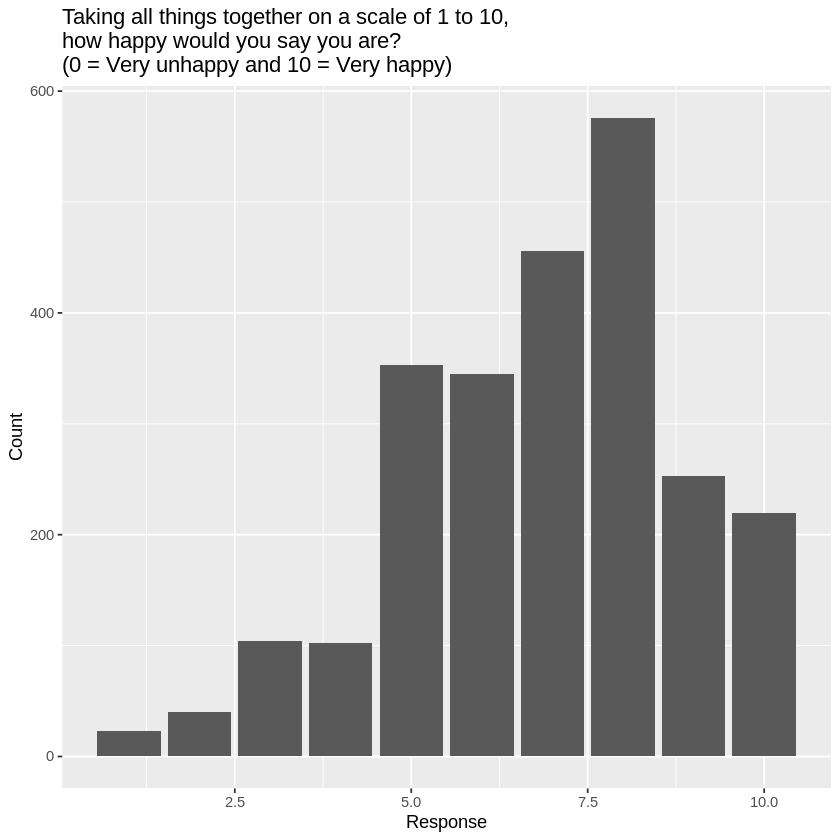

In [15]:
library(ggplot2)
#hist(dataPTsample$dataPT.Y16_Q5)
g <- ggplot(dataPTsample, aes(dataPTsample$dataPT.Y16_Q5))
g + geom_bar() + labs(title= "Taking all things together on a scale of 1 to 10, 
how happy would you say you are? \
(0 = Very unhappy and 10 = Very happy)",  y="Count", x = "Response")

### Y16_Income_Equivalised Variable label = Equivalised monthly household income in PPP euros

### transform - > Log 


In [16]:
summary(dataPTsample$dataPT.Y16_Income_Equivalised)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.212  394.515  629.723  828.191  980.309 9760.705 

In [0]:
dataPTsample$dataPT.Y16_Income_Equivalised_log <- log(dataPTsample$dataPT.Y16_Income_Equivalise)

In [18]:
summary(dataPTsample$dataPT.Y16_Income_Equivalised_log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1924  5.9777  6.4453  6.4388  6.8879  9.1861 

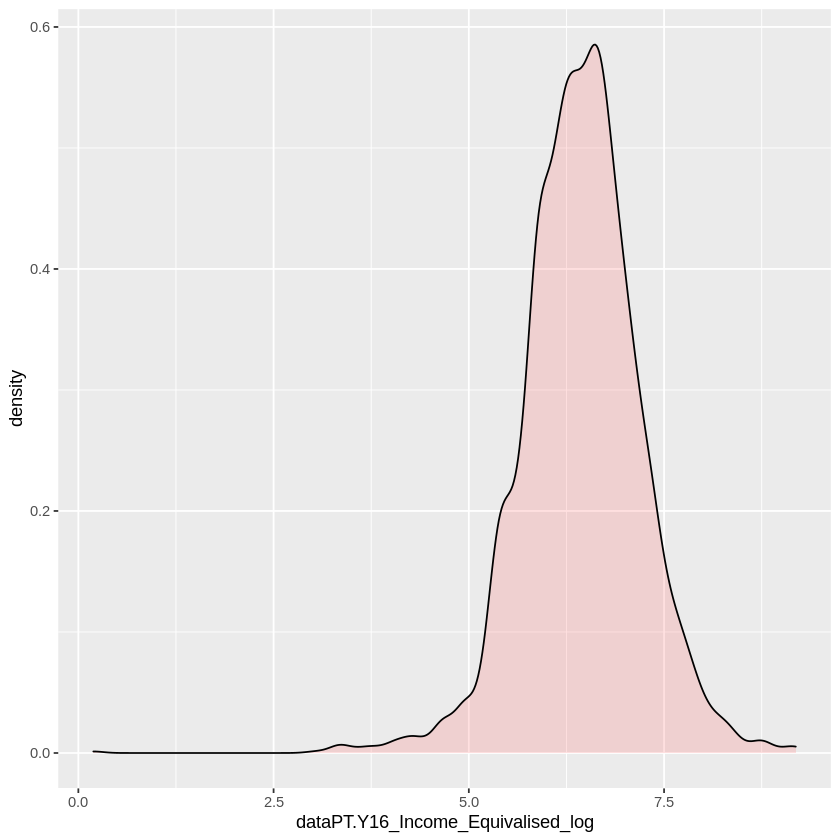

In [19]:
# Histogram with kernel density curve
#hist(dataPTsample$dataPT.Y16_Income_Equivalised_log)
ggplot(dataPTsample, aes(x = dataPT.Y16_Income_Equivalised_log)) +
    geom_density(alpha = .2, fill = "#FF6666")

# Gender

In [20]:
summary(dataPTsample$dataPT.Y16_HH2a)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.589   2.000   2.000 

In [0]:
dataPTsample <- subset(dataPTsample, dataPT.Y16_HH2a != '99' & dataPT.Y16_HH2a!= '98')

In [0]:
dataPTsample$dataPT.Y16_HH2a[dataPTsample$dataPT.Y16_HH2a == 1] <- 0

In [0]:
dataPTsample$dataPT.Y16_HH2a[dataPTsample$dataPT.Y16_HH2a == 2] <- 1

In [0]:
dataPTsample$dataPT.Y16_HH2a <- factor(dataPTsample$dataPT.Y16_HH2a)

In [25]:
summary(dataPTsample$dataPT.Y16_HH2a)

0    1 
1017 1455

In [26]:
table2 <- table(dataPTsample$dataPT.Y16_HH2a)
table2


   0    1 
1017 1455 

In [27]:
prop.table(table2)


        0         1 
0.4114078 0.5885922 

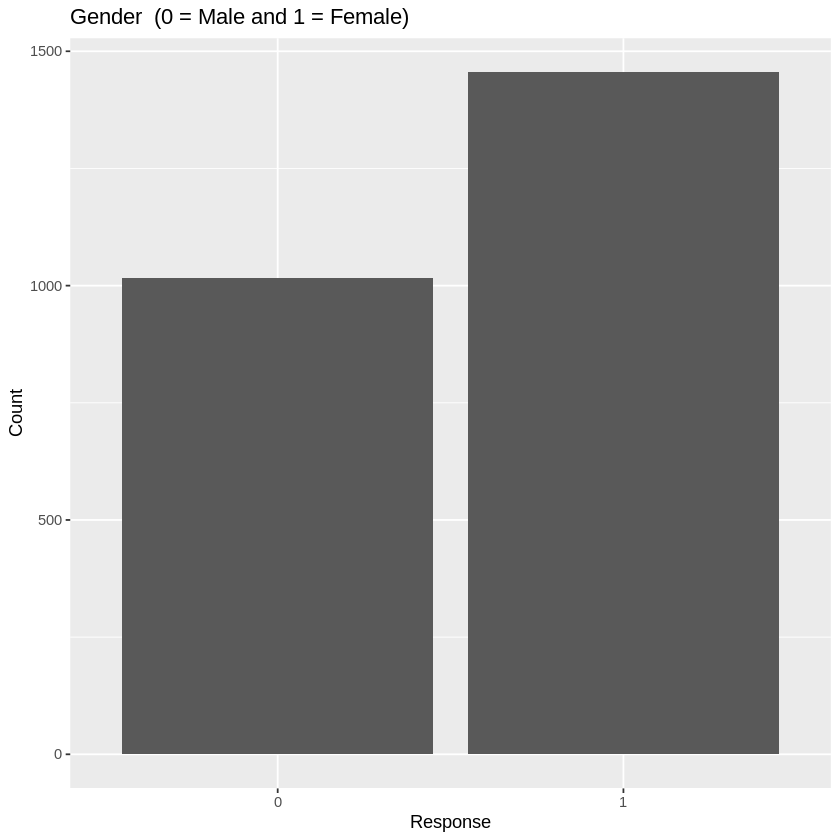

In [28]:
library(ggplot2)
#plot(dataPTsample$dataPT.Y16_HH2a)
g2 <- ggplot(dataPTsample, aes(dataPT.Y16_HH2a))
g2 + geom_bar() + labs(title= "Gender \ (0 = Male and 1 = Female)",  y="Count", x = "Response")

## Cleaned and transformed dataset summary

In [29]:
summary(dataPTsample)

 dataPT.Y16_Income_Equivalised dataPT.Y16_HH2a dataPT.Y16_Q5    dataPT.Y16_Q89a
 Min.   :   1.212              0:1017          Min.   : 1.000   8      :576    
 1st Qu.: 394.515              1:1455          1st Qu.: 5.000   7      :456    
 Median : 629.723                              Median : 7.000   5      :353    
 Mean   : 828.191                              Mean   : 6.851   6      :345    
 3rd Qu.: 980.309                              3rd Qu.: 8.000   9      :253    
 Max.   :9760.705                              Max.   :10.000   10     :220    
                                                                (Other):269    
 dataPT.Y16_Income_Equivalised_log
 Min.   :0.1924                   
 1st Qu.:5.9777                   
 Median :6.4453                   
 Mean   :6.4388                   
 3rd Qu.:6.8879                   
 Max.   :9.1861                   
                                  

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



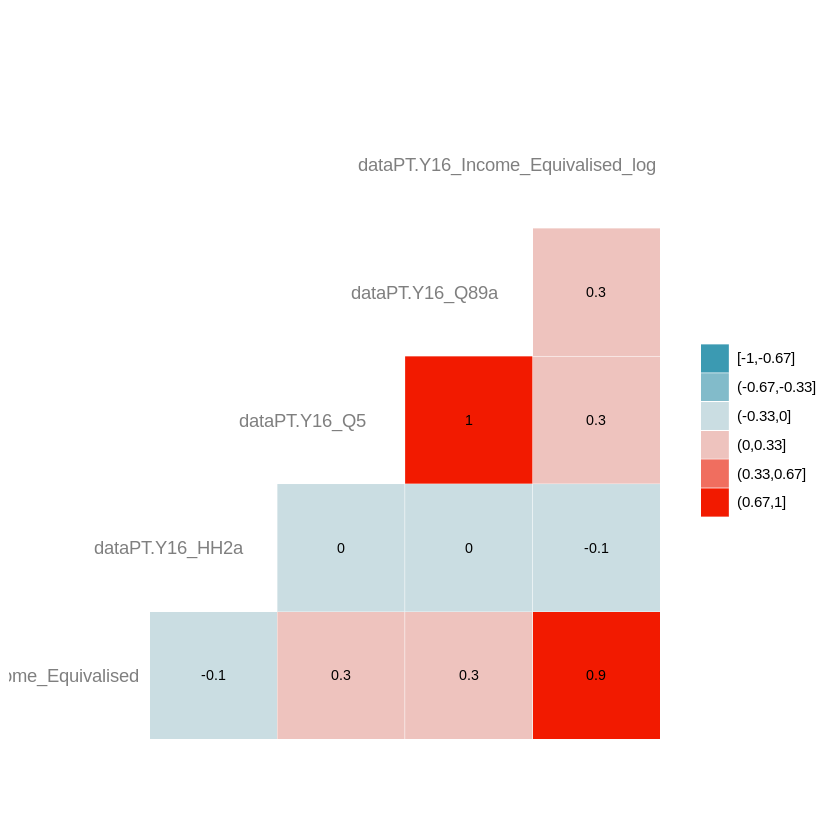

In [30]:
library(GGally)
dataPTsample_impcopy <- dataPTsample
# Convert data to numeric
corr <- data.frame(lapply(dataPTsample_impcopy, as.integer))
# Plot the graphggcorr(using GGally)
ggcorr(corr, method = c("everything", "spearman"), nbreaks = 6,
hjust = 0.8,label = TRUE, label_size = 3, color = "grey50")

## Linear Regression

## Intercept-only model

$log(dataPT.Y16_Income_Equivalised)=β_0=6.439$

We can say that 6.439 is the unconditional expected mean of log of Y16_Income_Equivalised. Therefore the exponentiated value is exp(6.439)=625.67079473529. 

In [31]:
lm(dataPTsample$dataPT.Y16_Income_Equivalised_log ~ 1)


Call:
lm(formula = dataPTsample$dataPT.Y16_Income_Equivalised_log ~ 
    1)

Coefficients:
(Intercept)  
      6.439  


In [32]:
mean(dataPTsample$dataPT.Y16_Income_Equivalised_log)

[1] 6.438824

In [33]:
exp(6.4388243457687)

[1] 625.6708

### Single binary predictor variable.


In [34]:
lm2 <-lm(dataPT.Y16_Income_Equivalised_log ~ as.factor(dataPT.Y16_HH2a) , data = dataPTsample)
summary(lm2)


Call:
lm(formula = dataPT.Y16_Income_Equivalised_log ~ as.factor(dataPT.Y16_HH2a), 
    data = dataPTsample)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3564 -0.4601  0.0117  0.4466  2.6374 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.54873    0.02344 279.402  < 2e-16 ***
as.factor(dataPT.Y16_HH2a)1 -0.18673    0.03055  -6.112 1.14e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7475 on 2470 degrees of freedom
Multiple R-squared:  0.0149,	Adjusted R-squared:  0.0145 
F-statistic: 37.36 on 1 and 2470 DF,  p-value: 1.139e-09


log (income) =β0+β1×female(1)
=6.46123+(-0.18673)×(1)

Y = a + bX

where Y is equal to our dependent variable and X is equal to our independent variable.

log(income) = 6.54873 + (-0.18673 x sex)

Since sex takes on the value of 1 for female and 0 for male, the predicted scores are as follows:

log(income) = 6.54873 + (-0.18673 x 1) =  (Female)

log(income) = 6.54873 + (-0.18673 x 0) = 6.73546 (Male)

* On average, females haves less 25% PPP compared with males

In [45]:
exp(0.22326)-1

[1] 0.2501456

### Multiple Regression



In [37]:
lm3 <-lm(dataPT.Y16_Income_Equivalised_log ~ dataPT.Y16_HH2a + as.factor(dataPT.Y16_Q5), data = dataPTsample)
summary(lm3)


Call:
lm(formula = dataPT.Y16_Income_Equivalised_log ~ dataPT.Y16_HH2a + 
    as.factor(dataPT.Y16_Q5), data = dataPTsample)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4583 -0.4058  0.0042  0.4167  2.7317 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 6.01402    0.15123  39.766  < 2e-16 ***
dataPT.Y16_HH2a1           -0.17283    0.02943  -5.873 4.87e-09 ***
as.factor(dataPT.Y16_Q5)2   0.25480    0.18807   1.355  0.17561    
as.factor(dataPT.Y16_Q5)3   0.16203    0.16559   0.979  0.32792    
as.factor(dataPT.Y16_Q5)4   0.15778    0.16592   0.951  0.34172    
as.factor(dataPT.Y16_Q5)5   0.25391    0.15468   1.641  0.10083    
as.factor(dataPT.Y16_Q5)6   0.44038    0.15478   2.845  0.00447 ** 
as.factor(dataPT.Y16_Q5)7   0.62565    0.15361   4.073 4.79e-05 ***
as.factor(dataPT.Y16_Q5)8   0.63667    0.15285   4.165 3.22e-05 ***
as.factor(dataPT.Y16_Q5)9   0.85232    0.15656   5.444 5.72e-08 ***
as.factor(dataPT.

log (income) =β0+β1×Level 10(10)
 =6.46123+(0.59048 )×(1)

Similar resoning, per each level: 

log(income) = 6.01402 + (0.25480 x 1) =  (Level 2)

...

log(income) = 6.01402 + (0.67827 x 1) =  (Level 10)

In [39]:
library(stargazer)
stargazer(lm3, type = 'text', no.space = TRUE)


                                  Dependent variable:       
                           ---------------------------------
                           dataPT.Y16_Income_Equivalised_log
------------------------------------------------------------
dataPT.Y16_HH2a1                       -0.173***            
                                        (0.029)             
as.factor(dataPT.Y16_Q5)2                0.255              
                                        (0.188)             
as.factor(dataPT.Y16_Q5)3                0.162              
                                        (0.166)             
as.factor(dataPT.Y16_Q5)4                0.158              
                                        (0.166)             
as.factor(dataPT.Y16_Q5)5                0.254              
                                        (0.155)             
as.factor(dataPT.Y16_Q5)6              0.440***             
                                        (0.155)             
as.factor(dataPT.Y16_Q5

 ## Adding interation gender and hapiness

In [40]:
lm4 <-lm(dataPT.Y16_Income_Equivalised_log ~ dataPT.Y16_HH2a + as.factor(dataPT.Y16_Q5) + (dataPT.Y16_HH2a * as.factor(dataPT.Y16_Q5)^2), data = dataPTsample)
summary(lm4)


Call:
lm(formula = dataPT.Y16_Income_Equivalised_log ~ dataPT.Y16_HH2a + 
    as.factor(dataPT.Y16_Q5) + (dataPT.Y16_HH2a * as.factor(dataPT.Y16_Q5)^2), 
    data = dataPTsample)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4401 -0.3951  0.0067  0.4147  2.6960 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                  6.06361    0.27162  22.324
dataPT.Y16_HH2a1                            -0.24410    0.32566  -0.750
as.factor(dataPT.Y16_Q5)2                    0.49970    0.32566   1.534
as.factor(dataPT.Y16_Q5)3                    0.06072    0.30073   0.202
as.factor(dataPT.Y16_Q5)4                    0.19038    0.29243   0.651
as.factor(dataPT.Y16_Q5)5                    0.15521    0.27797   0.558
as.factor(dataPT.Y16_Q5)6                    0.42650    0.27858   1.531
as.factor(dataPT.Y16_Q5)7                    0.58836    0.27669   2.126
as.factor(dataPT.Y16_Q5)8                    0.56886    0.27541

## Interpretation

* dependent/response variable is log-transformed 

To know for female (as dataPT.Y16_HH2a1 = 1) and each hapiness level, there are the following coeficients (as the base is for male)

* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)2:   0.29414    
* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)3:   0.68744    
* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)4:   0.83698    
* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)5:   0.64158    
* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)6:   0.96995    
* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)7:   0.87939    
* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)8:   0.75497    
* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)9:   0.91755    
* dataPT.Y16_HH2a1:as.factor(dataPT.Y16_Q5)10:  0.64090  


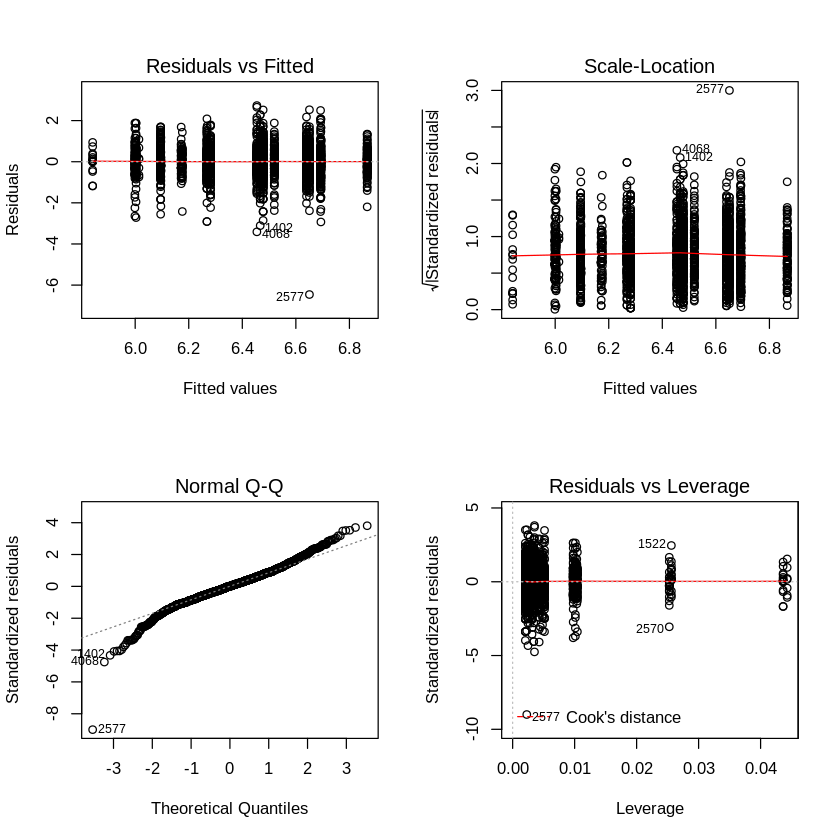

In [44]:
layout(matrix(c(1,2,3,4),2,2)) 
plot(lm3)